In [1]:
!wget https://nlp100.github.io/data/ai.ja.zip
!unzip ai.ja.zip

--2023-12-11 01:48:56--  https://nlp100.github.io/data/ai.ja.zip
Resolving nlp100.github.io (nlp100.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to nlp100.github.io (nlp100.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17516 (17K) [application/zip]
Saving to: ‘ai.ja.zip’

ai.ja.zip           100%[===================>]  17.11K  --.-KB/s    in 0.001s  

2023-12-11 01:48:56 (12.9 MB/s) - ‘ai.ja.zip’ saved [17516/17516]

Archive:  ai.ja.zip
  inflating: ai.ja.txt               
  inflating: readme.ai.ja.md         


In [2]:
%%bash
apt-get install mecab swig libmecab-dev mecab-ipadic-utf8
pip install mecab-python3

Reading package lists...
Building dependency tree...
Reading state information...
The following additional packages will be installed:
  libmecab2 mecab-ipadic mecab-utils swig4.0
Suggested packages:
  swig-doc swig-examples swig4.0-examples swig4.0-doc
The following NEW packages will be installed:
  libmecab-dev libmecab2 mecab mecab-ipadic mecab-ipadic-utf8 mecab-utils swig swig4.0
0 upgraded, 8 newly installed, 0 to remove and 15 not upgraded.
Need to get 8,483 kB of archives.
After this operation, 64.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libmecab2 amd64 0.996-14build9 [199 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libmecab-dev amd64 0.996-14build9 [306 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 mecab-utils amd64 0.996-14build9 [4,850 B]
Get:4 http://archive.ubuntu.com/ubuntu jammy/main amd64 mecab-ipadic all 2.7.0-20070801+main-3 [6,718 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy/u

In [3]:
%%bash
curl -sL -o CRF++-0.58.tar.gz "https://drive.google.com/uc?export=download&id=0B4y35FiV1wh7QVR6VXJ5dWExSTQ"
tar -zxf CRF++-0.58.tar.gz
cd CRF++-0.58
./configure && make && make install && ldconfig
cd ..

checking for a BSD-compatible install... /usr/bin/install -c
checking whether build environment is sane... yes
checking for a thread-safe mkdir -p... /usr/bin/mkdir -p
checking for gawk... no
checking for mawk... mawk
checking whether make sets $(MAKE)... yes
checking for gcc... gcc
checking whether the C compiler works... yes
checking for C compiler default output file name... a.out
checking for suffix of executables... 
checking whether we are cross compiling... no
checking for suffix of object files... o
checking whether we are using the GNU C compiler... yes
checking whether gcc accepts -g... yes
checking for gcc option to accept ISO C89... none needed
checking for style of include used by make... GNU
checking dependency style of gcc... gcc3
checking for g++... g++
checking whether we are using the GNU C++ compiler... yes
checking whether g++ accepts -g... yes
checking dependency style of g++... gcc3
checking how to run the C preprocessor... gcc -E
checking for grep that handles lo

In file included from /usr/include/string.h:535,
                 from /usr/include/c++/11/cstring:42,
                 from scoped_ptr.h:11,
                 from param.h:15,
                 from param.cpp:10:
In function ‘char* strncpy(char*, const char*, size_t)’,
    inlined from ‘bool CRFPP::Param::open(const char*, const CRFPP::Option*)’ at param.cpp:196:15:
/usr/include/x86_64-linux-gnu/bits/string_fortified.h:95:34: warning: ‘char* __builtin_strncpy(char*, const char*, long unsigned int)’ specified bound 8192 equals destination size [-Wstringop-truncation]
   95 |   return __builtin___strncpy_chk (__dest, __src, __len,
      |          ~~~~~~~~~~~~~~~~~~~~~~~~^~~~~~~~~~~~~~~~~~~~~~
   96 |                                   __glibc_objsize (__dest));
      |                                   ~~~~~~~~~~~~~~~~~~~~~~~~~
In file included from feature_index.h:21,
                 from tagger.h:17,
                 from encoder.cpp:22:
darts.h: In member function ‘T CRFPP::Darts::Dou

In [4]:
%%bash
url="https://drive.google.com/uc?export=download&id=0B4y35FiV1wh7SDd1Q1dUQkZQaUU"
curl -sc /tmp/cookie ${url} >/dev/null
code="$(awk '/_warning_/ {print $NF}' /tmp/cookie)"
curl -sLb /tmp/cookie ${url}"&confirm=${code}" -o cabocha-0.69.tar.bz2
tar -jxf cabocha-0.69.tar.bz2
cd cabocha-0.69
./configure -with-charset=utf-8 && make && make check && make install && ldconfig
pip install python/
cd ..


checking for a BSD-compatible install... /usr/bin/install -c
checking whether build environment is sane... yes
checking for a thread-safe mkdir -p... /usr/bin/mkdir -p
checking for gawk... no
checking for mawk... mawk
checking whether make sets $(MAKE)... yes
checking whether make supports nested variables... yes
checking whether to enable maintainer-specific portions of Makefiles... no
checking for gcc... gcc
checking whether the C compiler works... yes
checking for C compiler default output file name... a.out
checking for suffix of executables... 
checking whether we are cross compiling... no
checking for suffix of object files... o
checking whether we are using the GNU C compiler... yes
checking whether gcc accepts -g... yes
checking for gcc option to accept ISO C89... none needed
checking whether gcc understands -c and -o together... yes
checking for style of include used by make... GNU
checking dependency style of gcc... none
checking for g++... g++
checking whether we are using t

In [7]:
!cabocha -f1 -o ai.ja.txt.parsed ai.ja.txt

In [10]:
class Morph:
    def __init__(self, txt):
        col1 = txt.split('\t')
        col2 = col1[1].rstrip().split(',')
        self.surface = col1[0]
        self.base = col2[6]
        self.pos = col2[0]
        self.pos1 = col2[1]

    def __str__(self):
        return 'surface: {}, base: {}, pos: {}, pos1: {}'.format(self.surface, self.base, self.pos, self.pos1)

    def __repr__(self):
        return self.surface


file_path = './ai.ja.txt.parsed'
morphs = []
morph = []
with open(file_path, 'r', encoding='utf-8') as f:
    for row in f:
        if row.startswith('*'):
            continue
        elif row == 'EOS\n':
            if len(morph):
                morphs.append(morph)
                morph = []
        else:
            morph.append(Morph(row))
if len(morph):
    morphs.append(morph)

for morph in morphs[1]:
    print(morph)

surface: 人工, base: 人工, pos: 名詞, pos1: 一般
surface: 知能, base: 知能, pos: 名詞, pos1: 一般
surface: （, base: （, pos: 記号, pos1: 括弧開
surface: じん, base: じん, pos: 名詞, pos1: 一般
surface: こうち, base: こうち, pos: 名詞, pos1: 一般
surface: のう, base: のう, pos: 助詞, pos1: 終助詞
surface: 、, base: 、, pos: 記号, pos1: 読点
surface: 、, base: 、, pos: 記号, pos1: 読点
surface: AI, base: *, pos: 名詞, pos1: 一般
surface: 〈, base: 〈, pos: 記号, pos1: 括弧開
surface: エーアイ, base: *, pos: 名詞, pos1: 固有名詞
surface: 〉, base: 〉, pos: 記号, pos1: 括弧閉
surface: ）, base: ）, pos: 記号, pos1: 括弧閉
surface: と, base: と, pos: 助詞, pos1: 格助詞
surface: は, base: は, pos: 助詞, pos1: 係助詞
surface: 、, base: 、, pos: 記号, pos1: 読点
surface: 「, base: 「, pos: 記号, pos1: 括弧開
surface: 『, base: 『, pos: 記号, pos1: 括弧開
surface: 計算, base: 計算, pos: 名詞, pos1: サ変接続
surface: （, base: （, pos: 記号, pos1: 括弧開
surface: ）, base: ）, pos: 記号, pos1: 括弧閉
surface: 』, base: 』, pos: 記号, pos1: 括弧閉
surface: という, base: という, pos: 助詞, pos1: 格助詞
surface: 概念, base: 概念, pos: 名詞, pos1: 一般
surface: と, base: と, po

In [11]:
class Chunk:
    def __init__(self, morphs, dst):
        self.morphs = morphs
        self.dst = dst
        self.srcs = []


sentences = []
chunks = []
morphs = []
with open(file_path, 'r', encoding='utf-8') as f:
    for row in f:
        if row.startswith('*'):
            if len(morphs):
                chunks.append(Chunk(morphs, dst))
            morphs = []
            cols = row.split()
            dst = int(cols[2].rstrip('D'))
        elif row != 'EOS\n':
            morphs.append(Morph(row))
        else:
            if len(morphs):
                chunks.append(Chunk(morphs, dst))
            morphs = []
            if len(chunks):
                for i, chunk in enumerate(chunks):
                    dst = chunk.dst
                    if dst != -1:
                        chunks[dst].srcs.append(i)
                sentences.append(chunks)
            chunks = []

for chunk in sentences[1]:
    print(vars(chunk))

{'morphs': [人工, 知能], 'dst': 17, 'srcs': []}
{'morphs': [（, じん, こうち, のう, 、, 、], 'dst': 17, 'srcs': []}
{'morphs': [AI], 'dst': 3, 'srcs': []}
{'morphs': [〈, エーアイ, 〉, ）, と, は, 、], 'dst': 17, 'srcs': [2]}
{'morphs': [「, 『, 計算], 'dst': 5, 'srcs': []}
{'morphs': [（, ）, 』, という], 'dst': 9, 'srcs': [4]}
{'morphs': [概念, と], 'dst': 9, 'srcs': []}
{'morphs': [『, コンピュータ], 'dst': 8, 'srcs': []}
{'morphs': [（, ）, 』, という], 'dst': 9, 'srcs': [7]}
{'morphs': [道具, を], 'dst': 10, 'srcs': [5, 6, 8]}
{'morphs': [用い, て], 'dst': 12, 'srcs': [9]}
{'morphs': [『, 知能, 』, を], 'dst': 12, 'srcs': []}
{'morphs': [研究, する], 'dst': 13, 'srcs': [10, 11]}
{'morphs': [計算, 機, 科学], 'dst': 14, 'srcs': [12]}
{'morphs': [（, ）, の], 'dst': 15, 'srcs': [13]}
{'morphs': [一, 分野, 」, を], 'dst': 16, 'srcs': [14]}
{'morphs': [指す], 'dst': 17, 'srcs': [15]}
{'morphs': [語, 。], 'dst': 34, 'srcs': [0, 1, 3, 16]}
{'morphs': [「, 言語, の], 'dst': 20, 'srcs': []}
{'morphs': [理解, や], 'dst': 20, 'srcs': []}
{'morphs': [推論, 、], 'dst': 21, 'srcs': [1

In [12]:
def print_mods(sentence):
    for chunk in sentence:
        if chunk.dst != -1:
            modifier = ''.join([x.surface if x.pos != '記号' else '' for x in chunk.morphs])
            modifiee = ''.join([x.surface if x.pos != '記号' else '' for x in sentence[chunk.dst].morphs])
            print(modifier, modifiee, sep='\t')

print_mods(sentences[1])

人工知能	語
じんこうちのう	語
AI	エーアイとは
エーアイとは	語
計算	という
という	道具を
概念と	道具を
コンピュータ	という
という	道具を
道具を	用いて
用いて	研究する
知能を	研究する
研究する	計算機科学
計算機科学	の
の	一分野を
一分野を	指す
指す	語
語	研究分野とも
言語の	推論
理解や	推論
推論	問題解決などの
問題解決などの	知的行動を
知的行動を	代わって
人間に	代わって
代わって	行わせる
コンピューターに	行わせる
行わせる	技術または
技術または	研究分野とも
計算機	コンピュータによる
コンピュータによる	情報処理システムの
知的な	情報処理システムの
情報処理システムの	実現に関する
設計や	実現に関する
実現に関する	研究分野とも
研究分野とも	される


In [13]:
def print_mods_n2v(sentence):
    for chunk in sentence:
        if chunk.dst != -1:
            modifier_pos = [x.pos for x in chunk.morphs]
            modifiee_pos = [x.pos for x in sentence[chunk.dst].morphs]
            if '名詞' in modifier_pos and '動詞' in modifiee_pos:
                modifier = ''.join([x.surface if x.pos != '記号' else '' for x in chunk.morphs])
                modifiee = ''.join([x.surface if x.pos != '記号' else '' for x in sentence[chunk.dst].morphs])
                print(modifier, modifiee, sep='\t')

print_mods_n2v(sentences[1])

道具を	用いて
知能を	研究する
一分野を	指す
知的行動を	代わって
人間に	代わって
コンピューターに	行わせる
研究分野とも	される


In [26]:
!apt install fonts-ipafont-gothic
from graphviz import Digraph
from IPython.display import Image,display_png

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-ipafont-mincho
The following NEW packages will be installed:
  fonts-ipafont-gothic fonts-ipafont-mincho
0 upgraded, 2 newly installed, 0 to remove and 15 not upgraded.
Need to get 8,237 kB of archives.
After this operation, 28.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-ipafont-gothic all 00303-21ubuntu1 [3,513 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-ipafont-mincho all 00303-21ubuntu1 [4,724 kB]
Fetched 8,237 kB in 1s (6,353 kB/s)
Selecting previously unselected package fonts-ipafont-gothic.
(Reading database ... 121796 files and directories currently installed.)
Preparing to unpack .../fonts-ipafont-gothic_00303-21ubuntu1_all.deb ...
Unpacking fonts-ipafont-gothic (00303-21ubuntu1) ...
Selecting previously unselected package fonts-ipa

In [27]:
from graphviz import Digraph

def plot_tree(sentence):
    g = Digraph(format='png', filename='./ans44')
    g.attr('node', fontname="Meiryo") # 日本語対応
    for i, chunk in enumerate(sentence):
        if chunk.dst != -1:
            modifier = ''.join([x.surface if x.pos != '記号' else '' for x in chunk.morphs]) + '({})'.format(i)
            modifiee = ''.join([x.surface if x.pos != '記号' else '' for x in sentence[chunk.dst].morphs]) + '({})'.format(chunk.dst)
            g.edge(modifier, modifiee)
    g.view()

plot_tree(sentences[2])

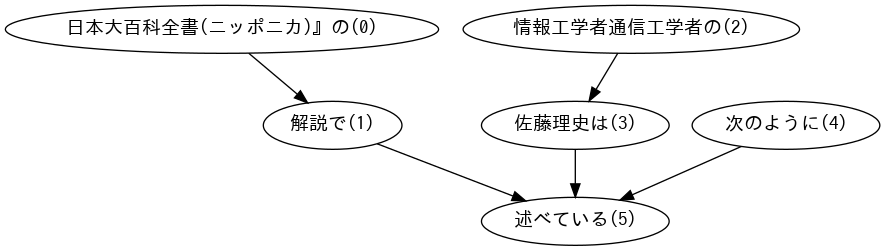

In [28]:
display_png(Image('./ans44.png'))

In [15]:
particles = []
for sentence in sentences:
    for chunk in sentence:
        for morph in chunk.morphs:
            if morph.pos == '動詞':
                if len(chunk.srcs):
                    modifier = []
                    for src in chunk.srcs:
                        modifier += [x.base for x in sentence[src].morphs if x.pos == '助詞']
                    if len(modifier):
                        modifier = sorted(list(set(modifier))) # 辞書順で並べ替え&重複削除
                        particles.append(morph.base + '\t' + ' '.join(modifier))
                break

with open('./input/section5/ans45.txt', 'w', encoding='utf-8') as f:
    f.write('\n'.join(particles))

# コーパス中で頻出する述語と格パターンの組み合わせ
from collections import Counter
c = Counter(particles)
for k, v in c.most_common(20):
    print(k, v)

# 「行う」「なる」「与える」という動詞の格パターン
print('------------行う----------------')
for k, v in c.most_common():
    if k.startswith('行う'):
        print(k, v)
print('------------なる----------------')
for k, v in c.most_common():
    if k.startswith('なる'):
        print(k, v)
print('------------与える----------------')
for k, v in c.most_common():
    if k.startswith('与える'):
        print(k, v)

する	を 49
する	が 19
する	と 15
する	に 15
する	は を 12
する	に を 10
する	で を 9
よる	に 9
行う	を 8
する	が に 8
呼ぶ	と 6
基づく	に 6
する	と は 6
する	と を 5
ある	が 5
する	に は を 5
する	が を 5
用いる	を 4
する	て を 4
する	て と 4
------------行う----------------
行う	を 8
行う	て に 1
行う	に を 1
行う	が て で に は 1
行う	は を 1
行う	に 1
行う	に により を 1
行う	て に を 1
行う	て に は 1
行う	から 1
行う	で に を 1
行う	で を 1
行う	て を 1
行う	に まで を 1
行う	が で は 1
行う	が で に は 1
行う	は を をめぐって 1
行う	まで を 1
------------なる----------------
なる	が と 3
なる	に は 3
なる	に 2
なる	と 2
なる	で と など は 1
なる	が て と 1
なる	から で と 1
なる	が に 1
なる	は 1
なる	が に は 1
なる	で に は 1
なる	から が て で と は 1
なる	に は も 1
なる	て として に は 1
なる	が で と に は 1
なる	が と にとって は 1
なる	て に は 1
なる	も 1
なる	で は 1
------------与える----------------
与える	が に 1
与える	が など に 1
与える	に は を 1


In [16]:
def get_info(sentence):
    particles = []
    for chunk in sentence:
        for morph in chunk.morphs:
            if morph.pos == '動詞':
                if len(chunk.srcs):
                    modifier = []
                    mod_dic = {}
                    particle = ''
                    for src in chunk.srcs:
                        for x in sentence[src].morphs:
                            if x.pos != '記号':
                                particle += x.surface
                            if x.pos == '助詞':
                                modifier.append(x.surface)
                                mod_dic[x.surface] = particle
                                particle = ''
                        particle = ''
                    if len(modifier):
                        modifier = sorted(list(set(modifier)))
                        particles.append(morph.base + '\t' + ' '.join(modifier) + '\t' + ' '.join([mod_dic[x] for x in modifier]))
                break
    return particles

particles = get_info(sentences[1])
for particle in particles:
    print(particle)

用いる	を	道具を
する	て を	用いて 知能を
指す	を	一分野を
代わる	に を	人間に 知的行動を
行う	て に	代わって コンピューターに
する	と も	研究分野と も


In [17]:
def get_info_mining(sentence):
    particles = []
    for chunk in sentence:
        predicate = ''
        for morph in chunk.morphs:
            if morph.pos == '動詞':
                if len(chunk.srcs):
                    modifier = []
                    mod_dic = {}
                    particle = ''
                    flg2 = 0
                    for src in chunk.srcs:
                        flg = 0
                        for x in sentence[src].morphs:
                            if x.pos == '名詞' and x.pos1 == 'サ変接続' and not flg2:
                                predicate += x.surface
                                flg = 1
                                continue
                            elif x.pos == '助詞' and x.surface == 'を' and flg == 1 and not flg2:
                                predicate += 'を'
                                flg = 0
                                flg2 = 1
                                continue
                            elif x.pos != '記号':
                                flg = 0
                                particle += x.surface
                            if x.pos == '助詞':
                                flg = 0
                                modifier.append(x.surface)
                                mod_dic[x.surface] = particle
                                particle = ''
                            else:
                                flg = 0
                        particle = ''
                    if len(modifier) and flg2:
                        modifier = sorted(list(set(modifier)))
                        particles.append(predicate + morph.base + '\t' + ' '.join(modifier) + '\t' + ' '.join([mod_dic[x] for x in modifier]))
                break
    return particles

for sentence in sentences:
    particles = get_info_mining(sentence)
    for particle in particles:
        print(particle)

行動を代わる	に	人間に
記述をする	と	主体と
注目を集める	が	サポートベクターマシンが
経験を行う	に を	元に 学習を
-推論統計学習をする	て で に は を を通して	なされて ACTRで 元に は ルールを 生成規則を通して
活躍敵対生成生成進化を見せる	て において は	加えて 技術において 的ネットワークは
製作開発を行う	は	エイダ・ラブレスは
処理を行う	に により	Webに ティム・バーナーズリーにより
意味をする	に	データに
付加処理を行う	て に	して コンピュータに
研究を進める	て	費やして
命令をする	で	機構で
運転をする	に	元に
特許をする	が に まで	日本が に 2018年まで
運転をする	て に	基づいて 柔軟に
注目を集める	から は	ことから ファジィは
制御を用いる	て も	受けて 他社も
制御をする	から	少なさから
処理改善を果たす	が で に	チームが 画像コンテストで 2012年に
研究を続ける	が て	ジェフホーキンスが 向けて
開発接地()をする	に は	8月に は
注目を集める	に	急速に
主導投資を行う	で に	民間企業で 全世界的に
実装探索を行う	で	無報酬で
推論をする	て	経て
共同研究を始める	とも は	マックスプランク研究所とも Googleは
研究を行う	て	始めて
研究開発をする	で は	官民一体で は
研究開発をする	で	日本で
投資をする	に は まで	に 韓国は 2022年まで
反乱を起こす	て に対して	於いて 人間に対して
歩行監視を行う	に まで	人工知能に 者まで
手続きを経る	を	ウイグル族を
プログラム制御をする	は	AIは
判断を介す	から	観点から
禁止を求める	が に は	ヒューマン・ライツ・ウォッチが 4月に は
開発競争を行う	は をめぐって	米国中国ロシアは 軍事利用をめぐって
暴露拒否整合追及を受ける	て で と とともに は	されて 性で すると とともに は
共同研究をする	が	Microsoftが
発表解任をする	て は	含まれて Google社員らは
要請解散をする	が で は	倫理委員会が 理由で Googleは
存在を見いだす	に	ものに
話をする	は	哲学者は
議論を行う	まで	これまで


In [20]:
def get_path(sentence):
    for chunk in sentence:
        modifier_pos = [x.pos for x in chunk.morphs]
        if '名詞' in modifier_pos and chunk.dst != -1:
            path = [''.join([x.surface if x.pos != '記号' else '' for x in chunk.morphs])]
            nxt = chunk.dst
            while nxt != -1:
                path.append(''.join([x.surface if x.pos != '記号' else '' for x in sentence[nxt].morphs]))
                nxt = sentence[nxt].dst
            print(' -> '.join(path))

get_path(sentences[1])

人工知能 -> 語 -> 研究分野とも -> される
じんこうちのう -> 語 -> 研究分野とも -> される
AI -> エーアイとは -> 語 -> 研究分野とも -> される
エーアイとは -> 語 -> 研究分野とも -> される
計算 -> という -> 道具を -> 用いて -> 研究する -> 計算機科学 -> の -> 一分野を -> 指す -> 語 -> 研究分野とも -> される
概念と -> 道具を -> 用いて -> 研究する -> 計算機科学 -> の -> 一分野を -> 指す -> 語 -> 研究分野とも -> される
コンピュータ -> という -> 道具を -> 用いて -> 研究する -> 計算機科学 -> の -> 一分野を -> 指す -> 語 -> 研究分野とも -> される
道具を -> 用いて -> 研究する -> 計算機科学 -> の -> 一分野を -> 指す -> 語 -> 研究分野とも -> される
知能を -> 研究する -> 計算機科学 -> の -> 一分野を -> 指す -> 語 -> 研究分野とも -> される
研究する -> 計算機科学 -> の -> 一分野を -> 指す -> 語 -> 研究分野とも -> される
計算機科学 -> の -> 一分野を -> 指す -> 語 -> 研究分野とも -> される
一分野を -> 指す -> 語 -> 研究分野とも -> される
語 -> 研究分野とも -> される
言語の -> 推論 -> 問題解決などの -> 知的行動を -> 代わって -> 行わせる -> 技術または -> 研究分野とも -> される
理解や -> 推論 -> 問題解決などの -> 知的行動を -> 代わって -> 行わせる -> 技術または -> 研究分野とも -> される
推論 -> 問題解決などの -> 知的行動を -> 代わって -> 行わせる -> 技術または -> 研究分野とも -> される
問題解決などの -> 知的行動を -> 代わって -> 行わせる -> 技術または -> 研究分野とも -> される
知的行動を -> 代わって -> 行わせる -> 技術または -> 研究分野とも -> される
人間に -> 代わって -> 行わせる -> 技術または -> 研究

In [19]:
sentence = sentences[2]
nouns = []
# 名詞を含むchunkを抽出
for i, chunk in enumerate(sentence):
    print(i, ''.join([morph.surface for morph in chunk.morphs]))
    if '名詞' in [morph.pos for morph in chunk.morphs]:
        nouns.append(i)
print('---------------------------')
print('名詞を含む文節番号: ', nouns)

0 『日本大百科全書(ニッポニカ)』の
1 解説で、
2 情報工学者・通信工学者の
3 佐藤理史は
4 次のように
5 述べている。
---------------------------
名詞を含む文節番号:  [0, 1, 2, 3, 4]


In [21]:
from itertools import combinations

print([x for x in combinations(nouns, 2)])

[(0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]


In [22]:
from itertools import combinations

def get_path_to_root(now, sentence):
    # 文節番号nowから根までのパスを求める
    # 出力は文節番号のリスト
    chunk = sentence[now]
    path = []
    if chunk.dst != -1:
        path.append(now)
        nxt = chunk.dst
        while nxt != -1:
            path.append(nxt)
            nxt = sentence[nxt].dst
    return path


sentence = sentences[2]
nouns = []
# 名詞を含むchunkを抽出
for i, chunk in enumerate(sentence):
    if '名詞' in [morph.pos for morph in chunk.morphs]:
        nouns.append(i)

# 名詞を含むchunkの全ペアを作成
for i, j in combinations(nouns, 2):
    pathx = get_path_to_root(i, sentence) # Xから根までのパス
    pathy = get_path_to_root(j, sentence) # Yから根までのパス
    path1 = []
    path2 = []
    path3 = []
    flg = 0
    if j in pathx:
        # パターン１
        for k in pathx:
            if k == i:
                morphs = 'X' + ''.join([x.surface if x.pos == '助詞' else '' for x in sentence[k].morphs])
                path1.append(''.join(morphs))
            elif k != j:
                morphs = ''.join([x.surface if x.pos != '記号' else '' for x in sentence[k].morphs])
                path1.append(''.join(morphs))
            else:
                morphs = 'Y' + ''.join([x.surface if x.pos == '助詞' else '' for x in sentence[k].morphs])
                path1.append(''.join(morphs))
                break
        print(' -> '.join(path1))
    else:
        # パターン2
        for k in pathx:
            if k == i:
                morphs = 'X' + ''.join([x.surface if x.pos == '助詞' else '' for x in sentence[k].morphs])
                path1.append(''.join(morphs))
            elif k not in pathy:
                morphs = ''.join([x.surface if x.pos != '記号' else '' for x in sentence[k].morphs])
                path1.append(''.join(morphs))
            else:
                break
        for l in pathy:
            if l == j:
                morphs = 'Y' + ''.join([x.surface if x.pos == '助詞' else '' for x in sentence[l].morphs])
                path2.append(''.join(morphs))
            elif l != k:
                morphs = ''.join([x.surface if x.pos != '記号' else '' for x in sentence[l].morphs])
                path2.append(''.join(morphs))
            elif l == k or flg:
                flg = 1
                morphs = ''.join([x.surface if x.pos != '記号' else '' for x in sentence[l].morphs])
                path3.append(''.join(morphs))
        print(' -> '.join(path1) + ' | ' + ' -> '.join(path2) + ' | ' + ' -> '.join(path3))

Xの -> Yで
Xの -> 解説で | Yの -> 佐藤理史は | 述べている
Xの -> 解説で | Yは | 述べている
Xの -> 解説で | Yのに | 述べている
Xで | Yの -> 佐藤理史は | 述べている
Xで | Yは | 述べている
Xで | Yのに | 述べている
Xの -> Yは
Xの -> 佐藤理史は | Yのに | 述べている
Xは | Yのに | 述べている
